<a href="https://colab.research.google.com/github/WITTER-JHU-APL/OCR-Tool/blob/neha-jupyter-notebooks/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train[2019]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 116, 255, 254, 255, 254, 254, 254, 142,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 254, 253, 253, 253, 253, 253, 253, 253, 149,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 254, 253, 253, 253, 253, 253, 253, 253, 253, 162,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 253, 253, 253, 253, 253, 253, 253, 253, 253,  93,   0,   0,   0

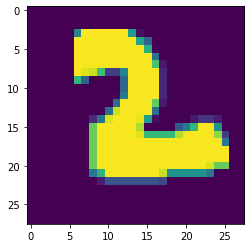

In [ ]:
# Use false colors to visualize the array.
plt.imshow(x_train[2019])

In [ ]:
# Output row #10 of example #2019.
x_train[2019][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 253, 253, 253, 253,  27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
# Output pixel #16 of row #10 of example #2019.
x_train[2019][10][16]

253

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2019][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.33333333 0.99215686 0.99215686 0.99215686 0.99215686 0.10588235
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [ ]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [ ]:
def create_model(my_learning_rate):
  
  model = tf.keras.models.Sequential()

  # The features arein a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/55
12/12 [==============================] - 1s 40ms/step - loss: 1.8590 - accuracy: 0.4036 - val_loss: 0.6596 - val_accuracy: 0.8426
Epoch 2/55
12/12 [==============================] - 0s 37ms/step - loss: 0.7490 - accuracy: 0.7749 - val_loss: 0.4091 - val_accuracy: 0.8877
Epoch 3/55
12/12 [==============================] - 0s 26ms/step - loss: 0.5378 - accuracy: 0.8405 - val_loss: 0.3434 - val_accuracy: 0.9047
Epoch 4/55
12/12 [==============================] - 0s 26ms/step - loss: 0.4484 - accuracy: 0.8686 - val_loss: 0.3000 - val_accuracy: 0.9150
Epoch 5/55
12/12 [==============================] - 0s 28ms/step - loss: 0.4055 - accuracy: 0.8814 - val_loss: 0.2766 - val_accuracy: 0.9222
Epoch 6/55
12/12 [==============================] - 0s 25ms/step - loss: 0.3729 - accuracy: 0.8895 - val_loss: 0.2596 - val_accuracy: 0.9269
Epoch 7/55
12/12 [==============================] - 0s 30ms/step - loss: 0.3429 - accuracy: 0.9009 - val_loss: 0.2446 - val_accuracy: 0.9320
Epoch 8/55
12

[0.13994872570037842, 0.960099995136261]

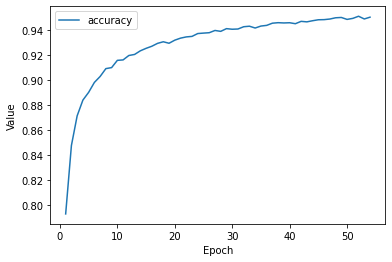

In [ ]:

learning_rate = 0.005
epochs = 55
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)

# Training the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)